## Imports

In [ ]:
import pandas as pd
import numpy as np

### Load train dataset

In [ ]:
df = pd.read_csv('raw/train.csv')

### Class Ratio

In [ ]:
total_len = len(df)
one = len(df[(df['activation'] == 1) & (df['ind_recommended'] == 1)])
two = len(df[(df['activation'] == 0) & (df['ind_recommended'] == 1)])
three = len(df[(df['activation'] == 1) & (df['ind_recommended'] == 0)])
four = len(df[(df['activation'] == 0) & (df['ind_recommended'] == 0)])

class_labels = ['Activation:1 & Ind_Recommended:1', 'Activation:0 & Ind_Recommended:1',
                'Activation:1 & Ind_Recommended:0', 'Activation:0 & Ind_Recommended:0']
class_counts = [one, two, three, four]

In [ ]:
print(class_counts)

[9843, 1537226, 60173, 10622736]


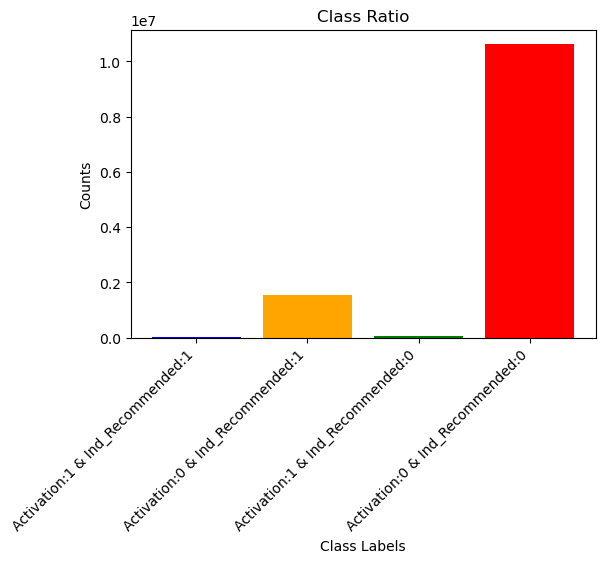

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(class_labels, class_counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Class Ratio')
plt.xticks(rotation=45, ha='right')
plt.show()

### Missing Values

In [ ]:
missing_percentage = (df.isna().mean() * 100).round(2)

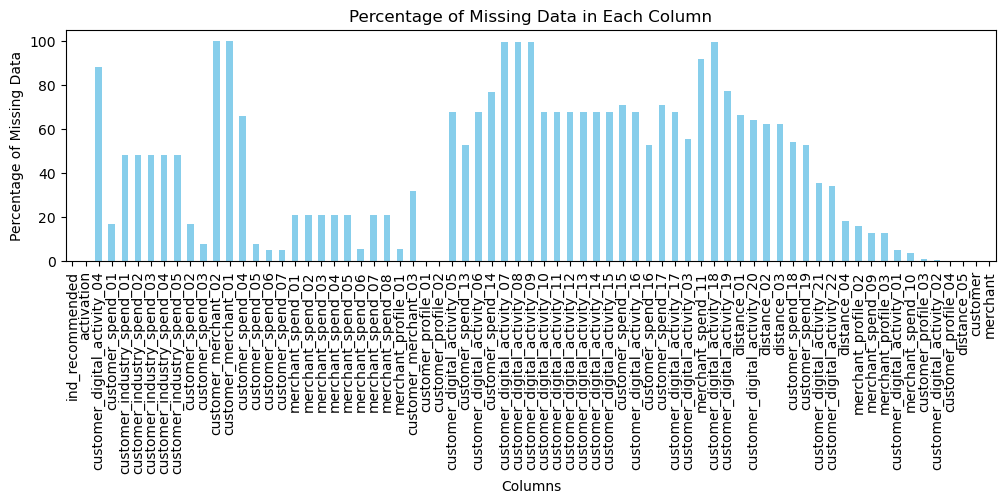

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(12, 3))
missing_percentage.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
plt.title('Percentage of Missing Data in Each Column')

# Show the plot
plt.show()

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
train_df.to_csv('processed/train_dataset.csv', index=False)
test_df.to_csv('processed/test_dataset.csv', index=False)

### Fill NA Values & Drop features


In [ ]:
import pandas as pd

def process(df):
  # Fill NA with boolean value(1 or 0)
  bool_cols = ['customer_digital_activity_04',
              'customer_digital_activity_07',
              'customer_digital_activity_08',
              'customer_digital_activity_09',
              'customer_digital_activity_18',
              'customer_merchant_01',
              'customer_merchant_02',
              'merchant_spend_11']
  for col in bool_cols:
      df[col] = df[col].notnull().astype(int)

  #Replace with Mean values
  mean_cols = ['customer_digital_activity_01',
              'customer_digital_activity_21',
              'distance_01',
              'distance_02',
              'distance_03',
              'distance_04',
              'distance_05']
  for col in mean_cols:
      df[col].fillna(df[col].mean(), inplace=True)

  #Replace with mean of each merchants
  mean_merchants = ['merchant_profile_02',
                    'merchant_profile_03']
  merchant_avg = df.groupby('merchant')[mean_merchants].mean()
  for col in mean_merchants:
      df[col] = df[col].fillna(df['merchant'].map(merchant_avg[col]))
  for col in mean_merchants:
      df[col].fillna(df[col].mean(), inplace=True)

  #Replace with mode of each column
  mode_cols = ['customer_digital_activity_05',
              'customer_digital_activity_06',
              'customer_digital_activity_10',
              'customer_digital_activity_11',
              'customer_digital_activity_12',
              'customer_digital_activity_13',
              'customer_digital_activity_14',
              'customer_digital_activity_15',
              'customer_digital_activity_16',
              'customer_digital_activity_17',
              'customer_digital_activity_20']
  for col in mode_cols:
      df[col].fillna(df[col].mode()[0], inplace=True)

  #Drop columns with unimportant features
  df.drop(columns=['merchant_profile_01', 'customer_digital_activity_09',
           "customer_digital_activity_18", "customer_spend_17",
             "customer_digital_activity_08"], axis=1, inplace= True)

  #Replace NA with Zero
  df = df.fillna(0)

  return df


### Resampling

In [ ]:
df = pd.read_csv('processed/train_dataset.csv')

In [ ]:
base_count = len(df[(df['activation'] == 1) & (df['ind_recommended'] == 0)])

In [ ]:
from sklearn.utils import resample

one = resample(df[(df['activation'] == 1) & (df['ind_recommended'] == 1)],replace=True, n_samples=base_count, random_state=42)
two = resample(df[(df['activation'] == 0) & (df['ind_recommended'] == 1)],replace=True, n_samples=base_count, random_state=42)
three = resample(df[(df['activation'] == 1) & (df['ind_recommended'] == 0)],replace=True, n_samples=base_count, random_state=42)
four = resample(df[(df['activation'] == 0) & (df['ind_recommended'] == 0)],replace=True, n_samples=base_count, random_state=42)

df = pd.concat([one, two, three, four])